In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df = pd.DataFrame(columns = ['Series', 'TV', 'radio','newspaper','sales'], data = df)
df

,Series,TV,radio,newspaper,sales
0,NaN,230.1,37.8,69.2,22.1
1,NaN,44.5,39.3,45.1,10.4
2,NaN,17.2,45.9,69.3,9.3
3,NaN,151.5,41.3,58.5,18.5
4,NaN,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,NaN,38.2,3.7,13.8,7.6
196,NaN,94.2,4.9,8.1,9.7
197,NaN,177.0,9.3,6.4,12.8
198,NaN,283.6,42.0,66.2,25.5


In [5]:
del df['Series']
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
df.shape

(200, 4)

In [7]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.value_counts()

TV     radio  newspaper  sales
0.7    39.6   8.7        1.6      1
206.9  8.4    26.4       12.9     1
197.6  3.5    5.9        11.7     1
       23.3   14.2       16.6     1
198.9  49.4   60.0       23.7     1
                                 ..
97.5   7.6    7.2        9.7      1
100.4  9.6    3.6        10.7     1
102.7  29.6   8.4        14.0     1
104.6  5.7    34.4       10.4     1
296.4  36.3   100.9      23.8     1
Length: 200, dtype: int64

In [10]:
df.nunique()

TV           190
radio        167
newspaper    172
sales        121
dtype: int64

In [11]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

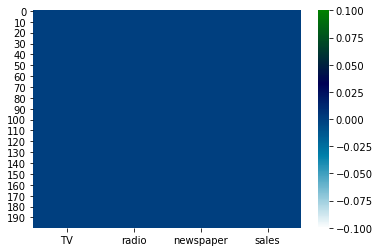

In [12]:
sns.heatmap(df.isnull(), cmap = 'ocean_r');

# EDA

In [13]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [14]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


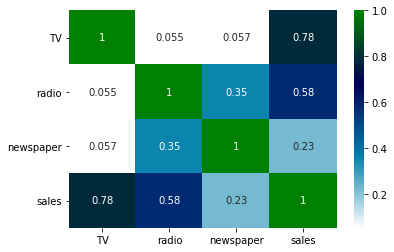

In [15]:
sns.heatmap(df.corr(), cmap = 'ocean_r', annot = True);

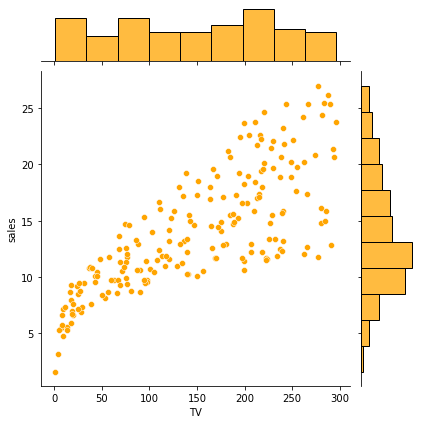

In [16]:
sns.jointplot(x='TV',y='sales',data=df, color='orange');

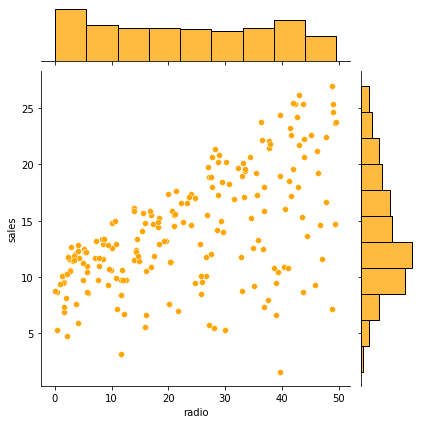

In [17]:
sns.jointplot(x='radio',y='sales',data=df, color='orange');

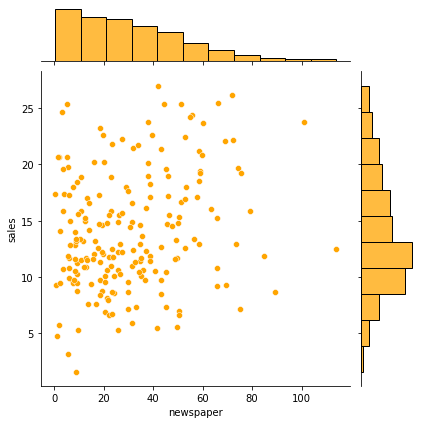

In [18]:
sns.jointplot(x='newspaper',y='sales',data=df, color='orange');

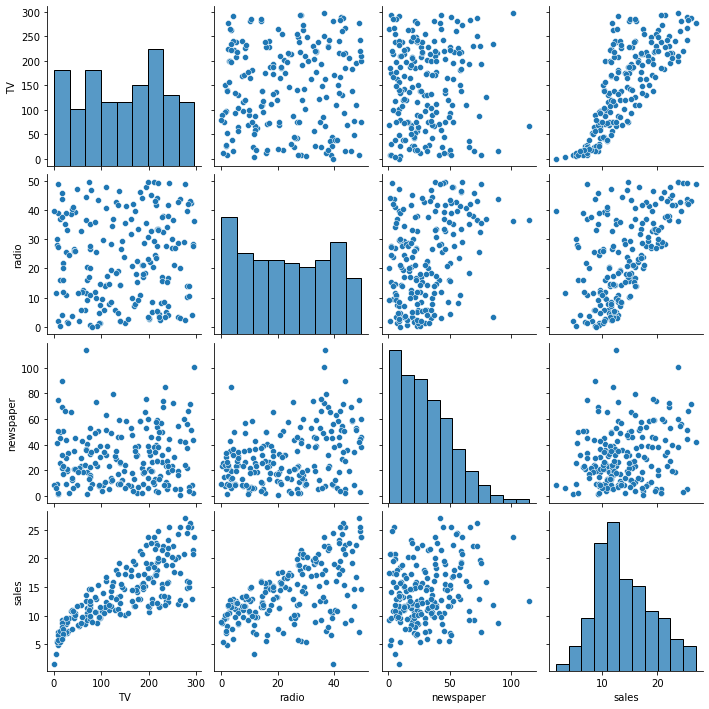

In [19]:
sns.pairplot(df)

In [20]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

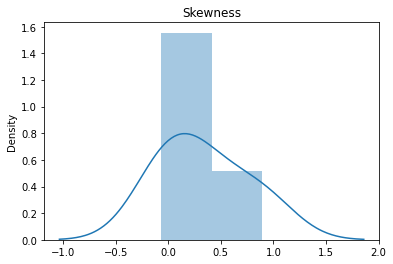

In [21]:
sns.distplot(df.skew())
plt.title('Skewness')
plt.show()

# Data Processing:

In [22]:
x = df.drop('sales', axis = 1)
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [23]:
y = df['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.22, random_state = 43)

In [28]:
print(x.shape, x_train.shape, x_test.shape)

(200, 3) (156, 3) (44, 3)


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 

In [26]:
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()
mnb = MultinomialNB()

In [27]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc.score(x_train, y_train)
preddtc = dtc.predict(x_test)
print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

ValueError: Unknown label type: 'continuous'